## Introduction to Matplotlib


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[]

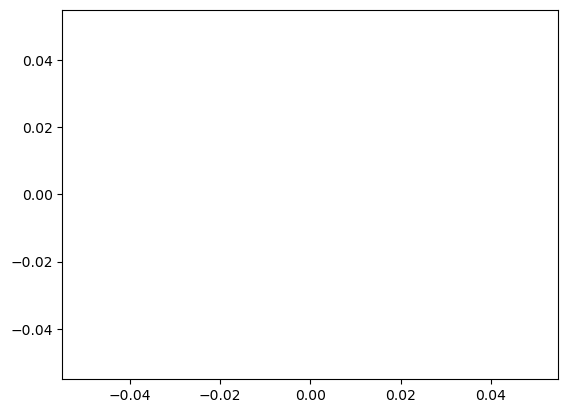

In [2]:
plt.plot()

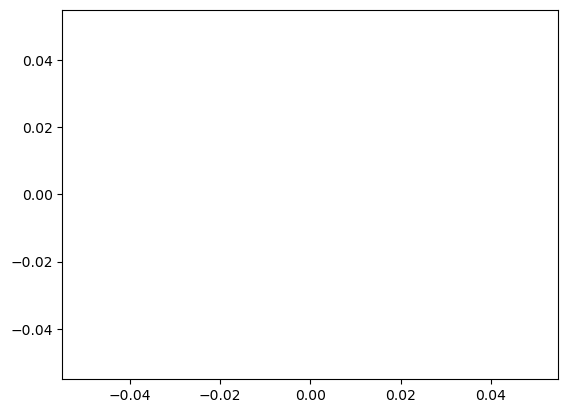

In [3]:
plt.plot();

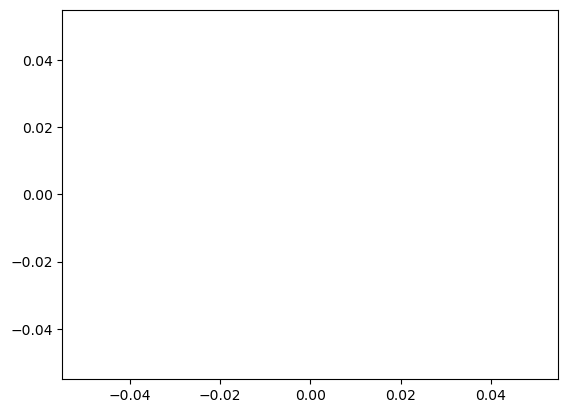

In [4]:
plt.plot()
plt.show()

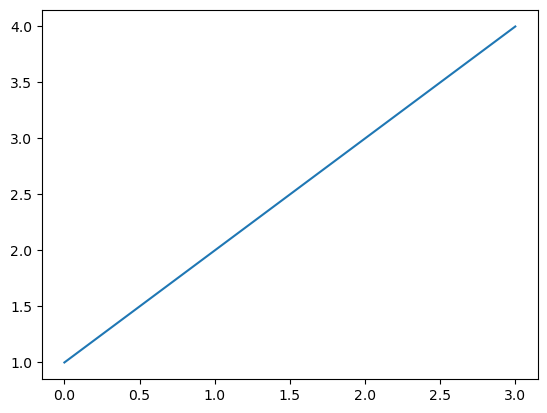

In [5]:
plt.plot([1, 2, 3, 4])

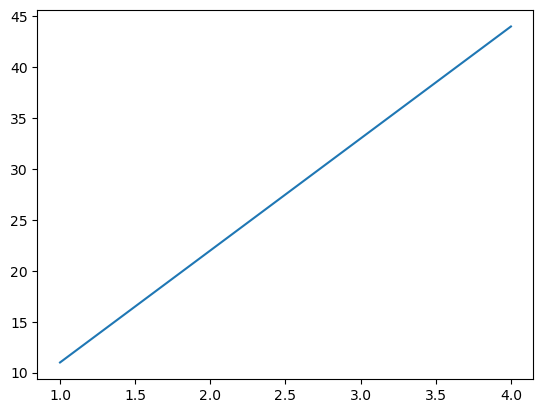

In [6]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
plt.plot(x, y)

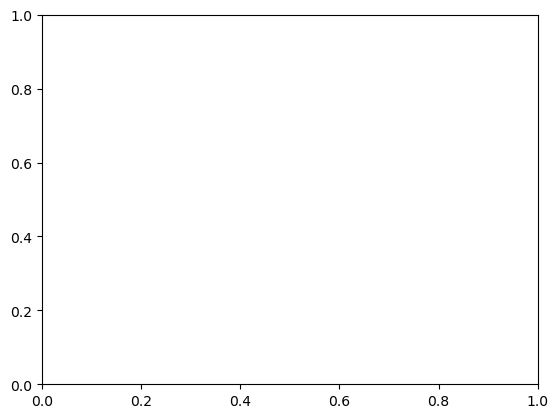

In [7]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # adds some axes
plt.show()

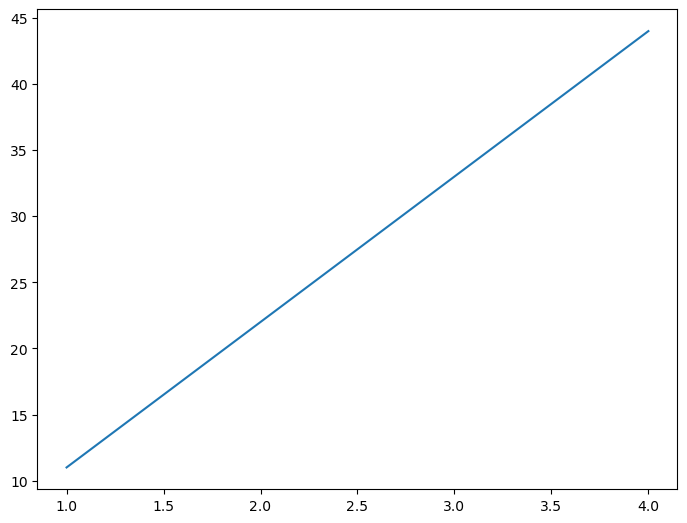

In [8]:
# 2nd method
fig = plt.figure() # Creates a figure
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y) # add some data
plt.show()

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

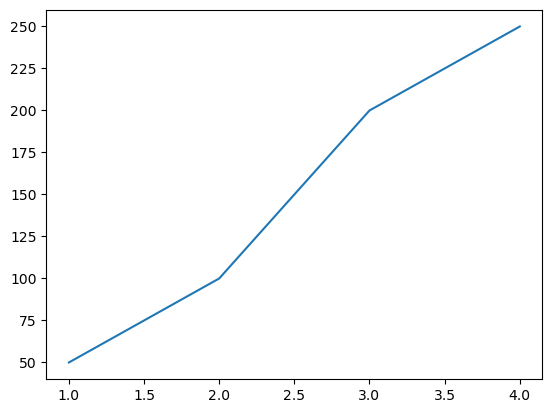

In [9]:
# 3rd method ( recommended)
fig, ax = plt.subplots()
ax.plot(x, [50, 100, 200, 250]); # add some data
type(fig), type(ax)

![matplotlib](matplotlib-anatomy-of-a-plot.png "Matplotlib")

## Matplotlib example workflow

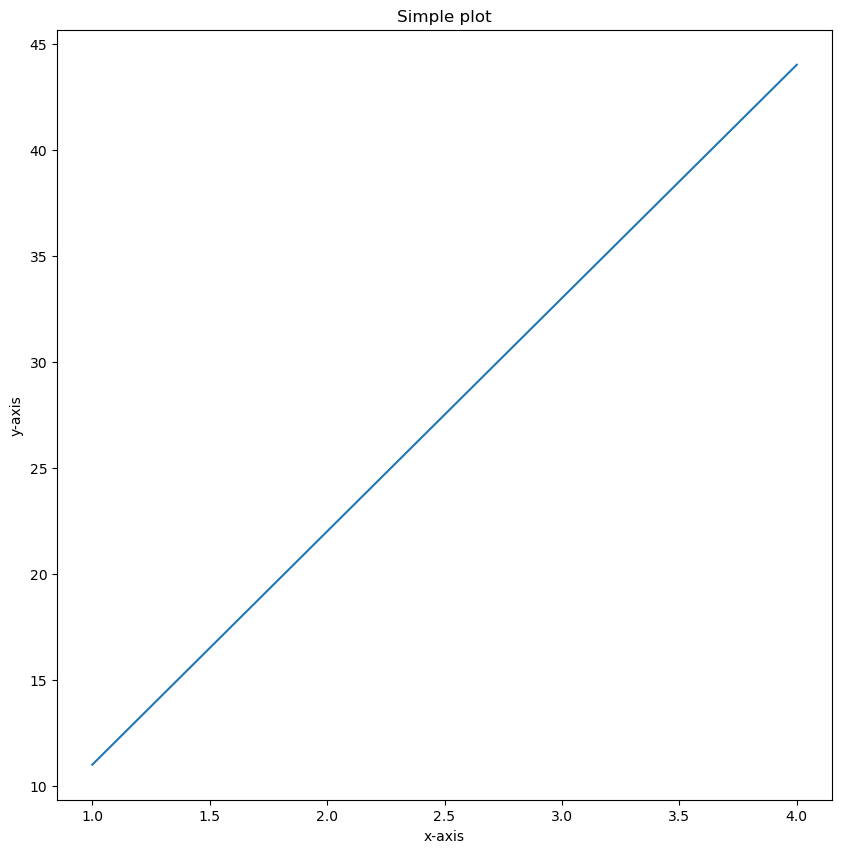

In [10]:
# 0. import matplotlib and get it ready for plotting in jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. prepare data
x = [1, 2, 3, 4]
y = [11, 22 ,33 ,44]

# 2. setup plot
fig, ax = plt.subplots(figsize=(10, 10)) # (width , height)

# 3. plot data
ax.plot(x, y)

# 4. customize plot
ax.set(title="Simple plot",
    xlabel = "x-axis",
    ylabel = "y-axis")

# 5. save & show ( you save the whole figure)
fig.savefig("sample-plot.png")

## Making figures with NumPy arrays

In [11]:
import numpy as np


In [12]:
# Create some data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

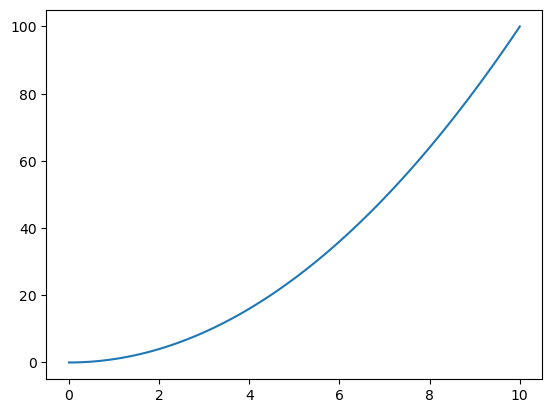

In [13]:
# Plot the data and create a line plot
fig, ax = plt.subplots()
ax.plot(x, x**2);

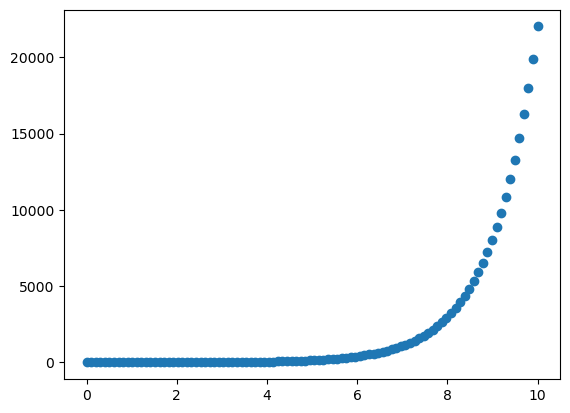

In [14]:
# Use the same data to make a scatter
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

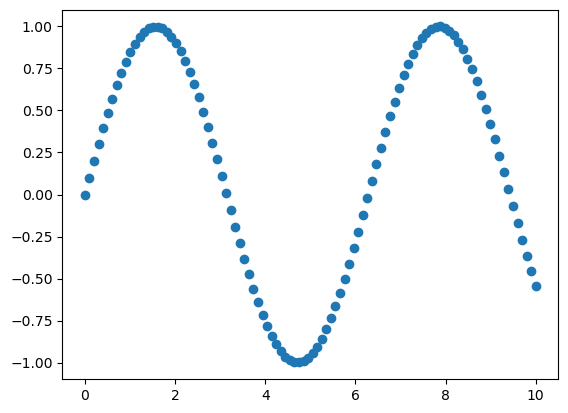

In [15]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

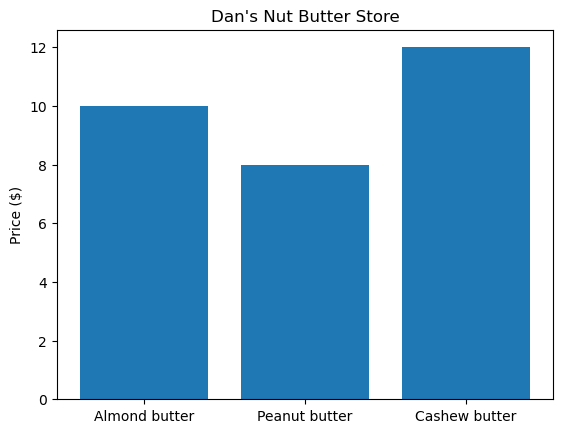

In [16]:
# Make a plot from dictionary
nut_butter_prices =  {"Almond butter": 10,
                    "Peanut butter": 8,
                    "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Dan's Nut Butter Store",
    ylabel="Price ($)");


<BarContainer object of 3 artists>

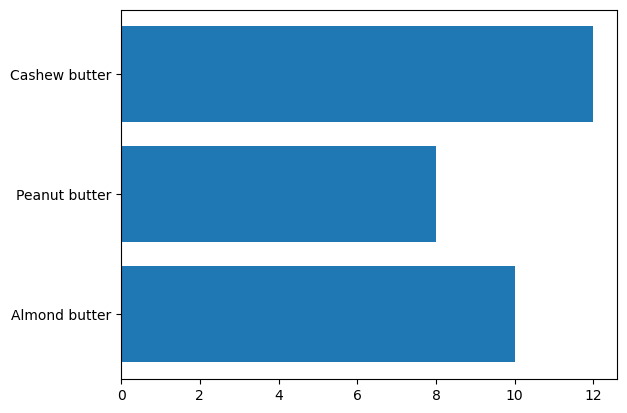

In [17]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()))

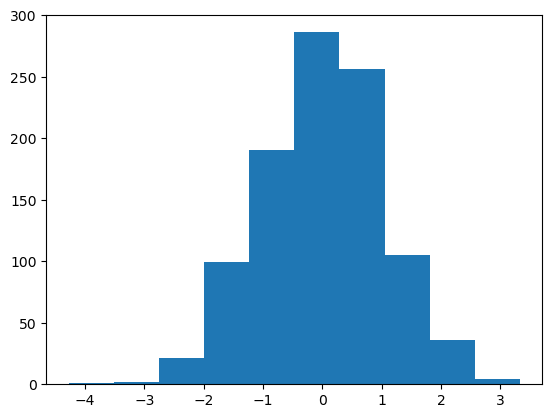

In [18]:
# Make some data for histograms and plot it
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

## Two options for subplots

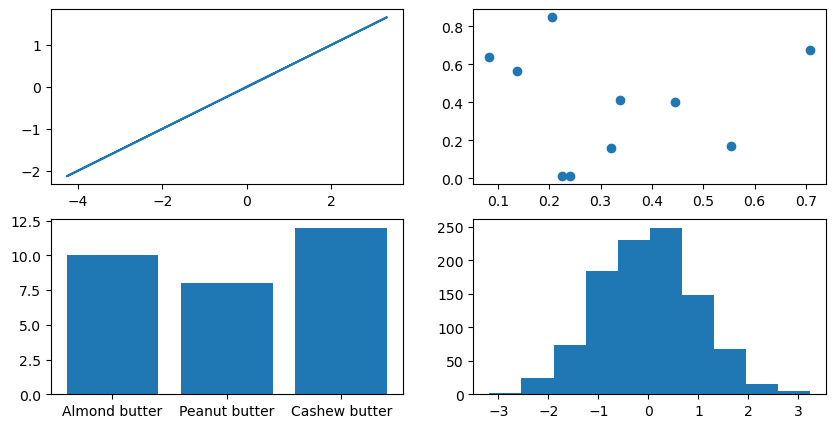

In [19]:
# Subplot option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                                ncols=2,
                                                figsize=(10, 5)) 
# plot to each different axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

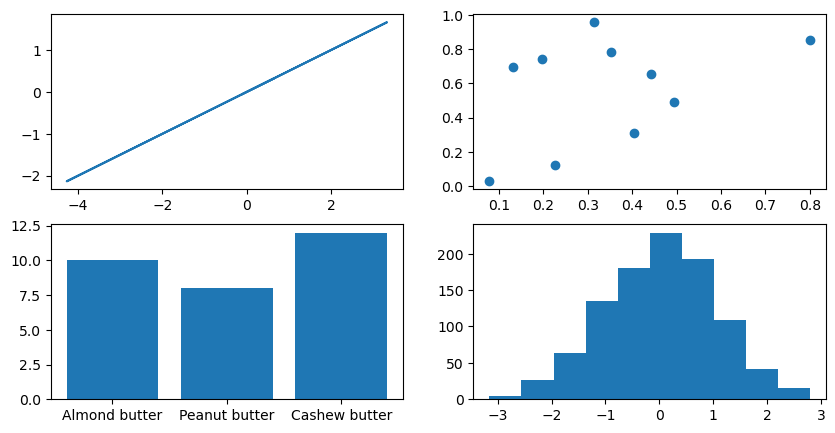

In [20]:
# Subplot option 2
fig, ax = plt.subplots(nrows=2,
                        ncols=2,
                        figsize=(10,5))
# plot to each different index
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(np.random.randn(1000));

## Plotting from pandas DataFrames

In [21]:
import pandas as pd

In [22]:
# Make a dataframe
car_sales = pd.read_csv("../Pandas/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


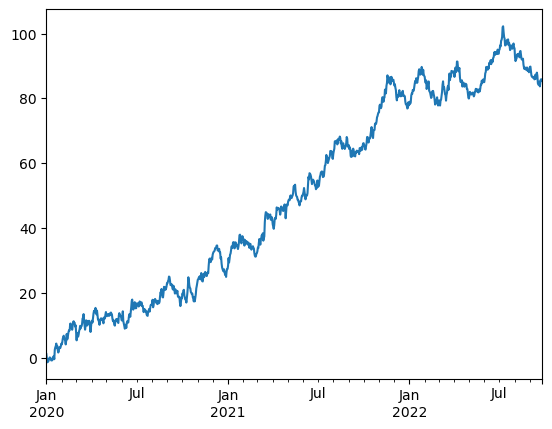

In [23]:
ts = pd.Series(np.random.randn(1000),
                index=pd.date_range('1/1/2020', periods=1000))
ts = ts.cumsum()
ts.plot();

In [24]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [25]:
car_sales["Price"] = car_sales["Price"].str.replace("[\\$\\,\\.]", "", regex=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [26]:
# Remove last two zeros
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [27]:
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(car_sales) )
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [29]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


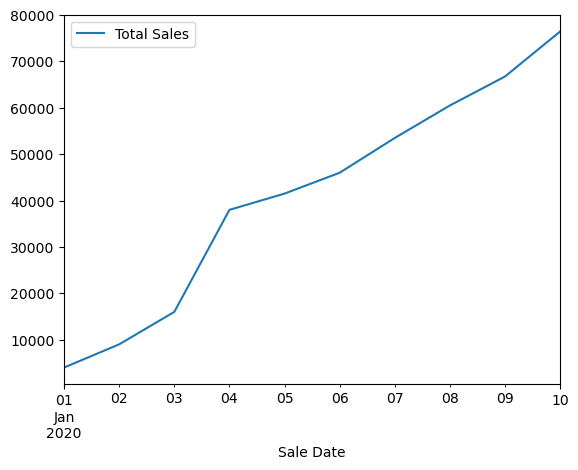

In [30]:
# Let's plot the total sales
car_sales.plot(x="Sale Date", y="Total Sales");

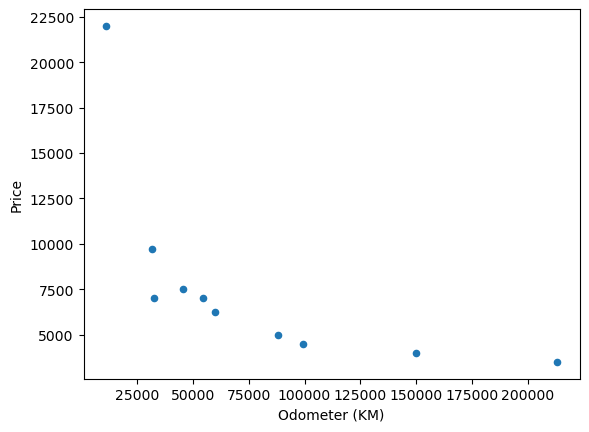

In [32]:
car_sales["Price"] = car_sales["Price"].astype(int)

car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [34]:
# How about a bar graph
x = np.random.rand(10,4)
x

# Turn it into a dataframe
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.635299,0.312511,0.608583,0.430968
1,0.943975,0.164762,0.274690,0.663857
2,0.867494,0.729399,0.793891,0.786405
3,0.430045,0.953261,0.834631,0.786239
4,0.667855,0.075000,0.264527,0.648012
5,0.980340,0.225282,0.225871,0.968460
6,0.804965,0.839485,0.525801,0.609324
7,0.305607,0.160776,0.648064,0.432829
8,0.598376,0.865953,0.561678,0.930117
9,0.963738,0.231972,0.541148,0.452841


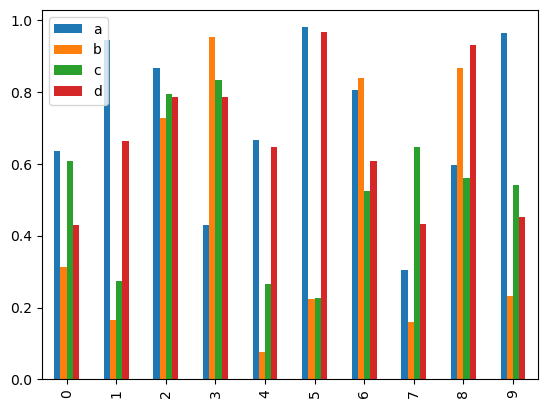

In [35]:
df.plot.bar();

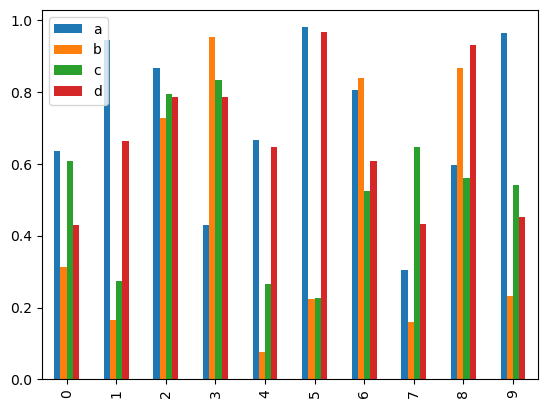

In [36]:
df.plot(kind="bar");

In [37]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


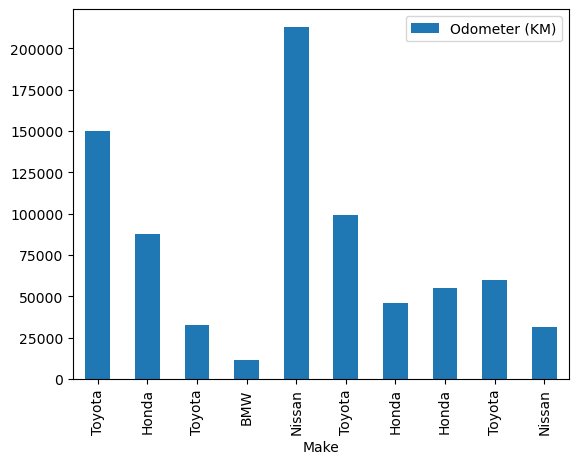

In [39]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

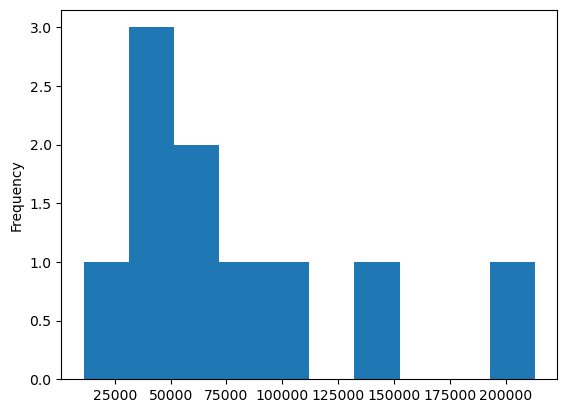

In [40]:
# How about histograms?
car_sales["Odometer (KM)"].plot.hist();

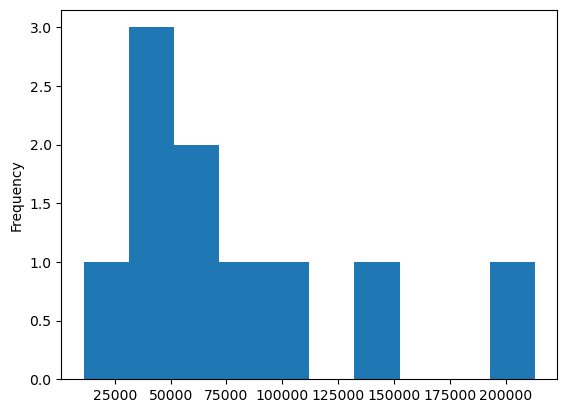

In [41]:
car_sales["Odometer (KM)"].plot(kind="hist");

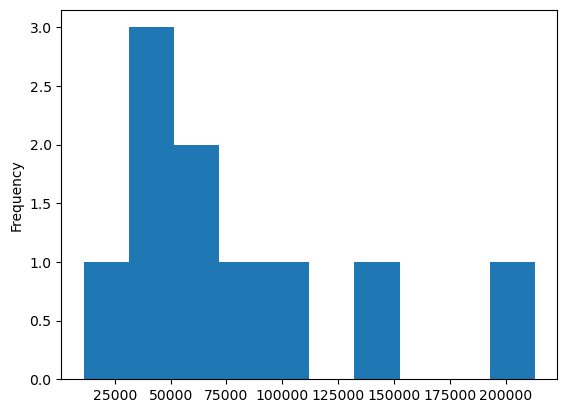

In [44]:
car_sales["Odometer (KM)"].plot.hist(bins=10);